In [23]:
from alpaca import ALPcouplings, branching_ratio
from alpaca.experimental_data.measurements_exp import babar_btoksnunu_lightmediator, belleII_bptoknunu_lightmediator
from alpaca.models import model_library
from alpaca.experimental_data.measurements_exp import belle_Y1S_mumu
from alpaca.constants import metap, mmu, mtau, mc
from alpaca.statistics.chisquared import chi2_obs, combine_chi2
from alpaca.statistics.functions import nsigmas
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'text.usetex':True})

## QED-DFSZ

In [2]:
get_couplings = np.vectorize(lambda f, theta: model_library.QED_DFSZ.get_couplings({model_library.beta: theta}, f).match_run(10, 'VA_below', integrator='leadinglog'))

In [17]:
cu_fa, ce_fa = np.meshgrid(np.logspace(-2.01,-8,10), np.logspace(-2.01,-8,10))
beta = np.arctan(np.sqrt(cu_fa/ce_fa))
fa = np.double(2/(cu_fa + ce_fa))

Scale $f_a$

Text(0.5, 1.0, '$f_a [GeV]$')

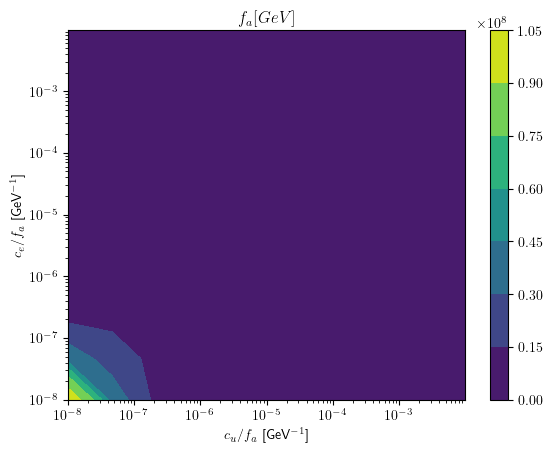

In [28]:
plt.contourf(cu_fa, ce_fa, fa)
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
cbar = plt.colorbar()
plt.xlabel(r'$c_u/f_a$ [GeV$^{-1}$]')
plt.ylabel(r'$c_e/f_a$ [GeV$^{-1}$]')
plt.title(r'$f_a [GeV]$')

### $m_a$ = 0.2 GeV

In [29]:
chi2_bknunu_babar_ma02 = chi2_obs(babar_btoksnunu_lightmediator, 'B0 -> K*0 a', np.array([.2]), get_couplings(fa, beta), fa, integrator='no_rge' )
chi2_bknunu_belleII_ma02 = chi2_obs(belleII_bptoknunu_lightmediator, 'B+ -> K+ a',np.array([.2]), get_couplings(fa, beta), fa, integrator='no_rge' )

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/ckmutil/ckm.py:23: ComplexWarning: Casting complex values to real discards the imaginary part
  c12 = cos(t12)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/ckmutil/ckm.py:25: ComplexWarning: Casting complex values to real discards the imaginary part
  c23 = cos(t23)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/ckmutil/ckm.py:26: ComplexWarning: Casting complex values to real discards the imaginary part
  s12 = sin(t12)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/ckmutil/ckm.py:28: ComplexWarning: Casting complex values to real discards the imaginary part
  s23 = sin(t23)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/ckmutil/ckm.py:23: ComplexWarning: Casting complex values to real discards the imaginary part
  c12 = cos(t12)
/Library/Frameworks/Python.framework/Versions

In [30]:
chi2tot_bknunu_ma02 = combine_chi2(chi2_bknunu_belleII_ma02, chi2_bknunu_babar_ma02)

Text(0.5, 1.0, '$B^+ \\to K^+ a$ at Belle II, QED-DFSZ with $m_a = 0.2$ GeV')

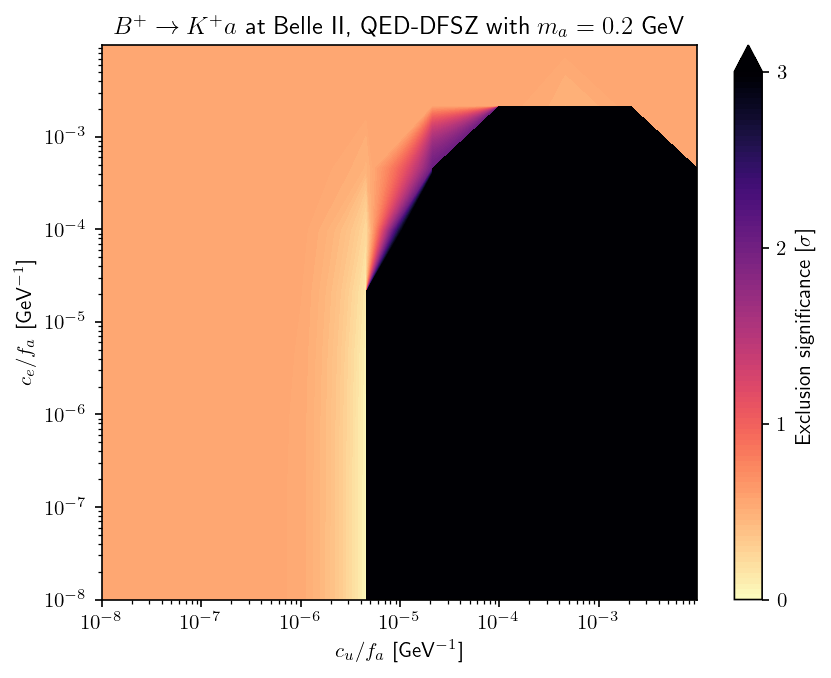

In [31]:
plt.figure(dpi=150)
pl = plt.contourf(cu_fa, ce_fa, nsigmas(np.real(chi2_bknunu_belleII_ma02),2), levels=list(np.linspace(0, 3, 100)), cmap='magma_r', vmax=3, extend='max')
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
cb = plt.colorbar(pl, extend='max')
cb.set_label(r'Exclusion significance [$\sigma$]')
cb.set_ticks([0, 1, 2, 3])
plt.xlabel(r'$c_u/f_a$ [GeV$^{-1}$]')
plt.ylabel(r'$c_e/f_a$ [GeV$^{-1}$]')
plt.title(r'$B^+ \to K^+ a$ at Belle II, QED-DFSZ with $m_a = 0.2$ GeV')

Text(0.5, 1.0, '$B \\to K a$ at BaBar, QED-DFSZ with $m_a=0.2$ GeV')

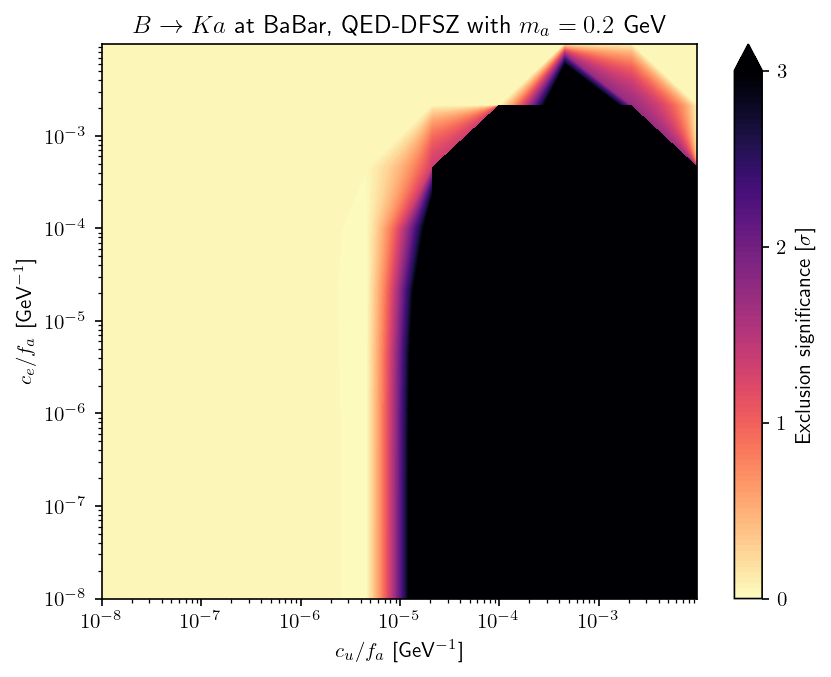

In [32]:
plt.figure(dpi=150)
pl = plt.contourf(cu_fa, ce_fa, nsigmas(np.real(chi2_bknunu_babar_ma02),2), levels=list(np.linspace(0, 3, 100)), cmap='magma_r', vmax=3, extend='max')
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
cb = plt.colorbar(pl, extend='max')
cb.set_label(r'Exclusion significance [$\sigma$]')
cb.set_ticks([0, 1, 2, 3])
plt.xlabel(r'$c_u/f_a$ [GeV$^{-1}$]')
plt.ylabel(r'$c_e/f_a$ [GeV$^{-1}$]')
plt.title(r'$B \to K a$ at BaBar, QED-DFSZ with $m_a=0.2$ GeV')

Text(0.5, 1.0, 'Belle II + BaBar, QED-DFSZ with $m_a = 0.2$ GeV')

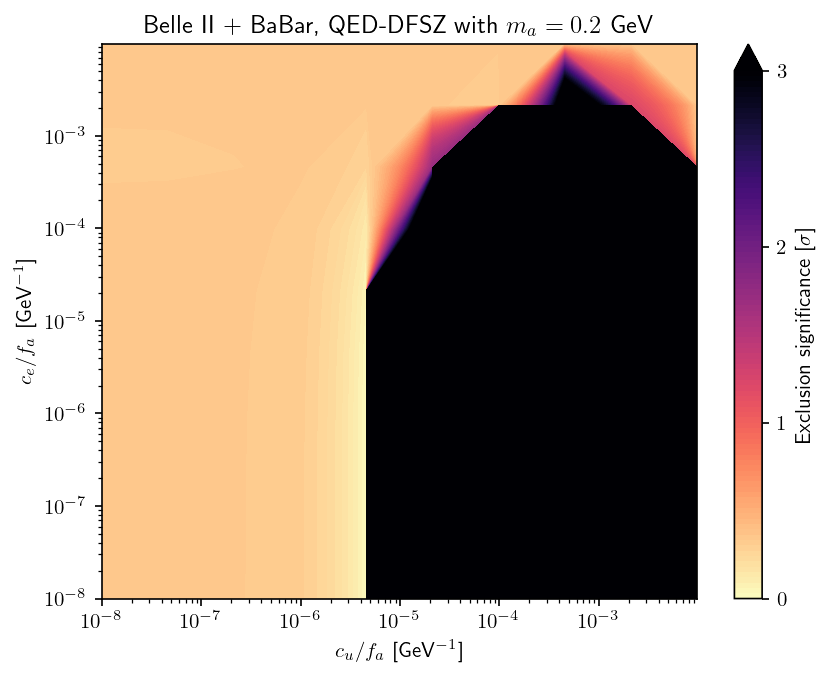

In [33]:
plt.figure(dpi=150)
pl = plt.contourf(cu_fa, ce_fa, nsigmas(np.real(chi2tot_bknunu_ma02),2), levels=list(np.linspace(0, 3, 100)), cmap='magma_r', vmax=3, extend='max')
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
cb = plt.colorbar(pl, extend='max')
cb.set_label(r'Exclusion significance [$\sigma$]')
cb.set_ticks([0, 1, 2, 3])
plt.xlabel(r'$c_u/f_a$ [GeV$^{-1}$]')
plt.ylabel(r'$c_e/f_a$ [GeV$^{-1}$]')
plt.title(r'Belle II + BaBar, QED-DFSZ with $m_a = 0.2$ GeV')

### $m_a$ = 2 GeV

In [34]:
chi2_bknunu_babar_ma2 = chi2_obs(babar_btoksnunu_lightmediator, 'B0 -> K*0 a', np.array([2.]), get_couplings(fa, beta), fa, integrator='no_rge' )
chi2_bknunu_belleII_ma2 = chi2_obs(belleII_bptoknunu_lightmediator, 'B+ -> K+ a',np.array([2.]), get_couplings(fa, beta), fa, integrator='no_rge' )

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/ckmutil/ckm.py:23: ComplexWarning: Casting complex values to real discards the imaginary part
  c12 = cos(t12)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/ckmutil/ckm.py:25: ComplexWarning: Casting complex values to real discards the imaginary part
  c23 = cos(t23)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/ckmutil/ckm.py:26: ComplexWarning: Casting complex values to real discards the imaginary part
  s12 = sin(t12)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/ckmutil/ckm.py:28: ComplexWarning: Casting complex values to real discards the imaginary part
  s23 = sin(t23)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/ckmutil/ckm.py:23: ComplexWarning: Casting complex values to real discards the imaginary part
  c12 = cos(t12)
/Library/Frameworks/Python.framework/Versions

In [35]:
chi2tot_bknunu_ma2 = combine_chi2(chi2_bknunu_belleII_ma2, chi2_bknunu_babar_ma2)

Text(0.5, 1.0, '$B^+ \\to K^+ a$ at Belle II, QED-DFSZ with $m_a = 2$ GeV')

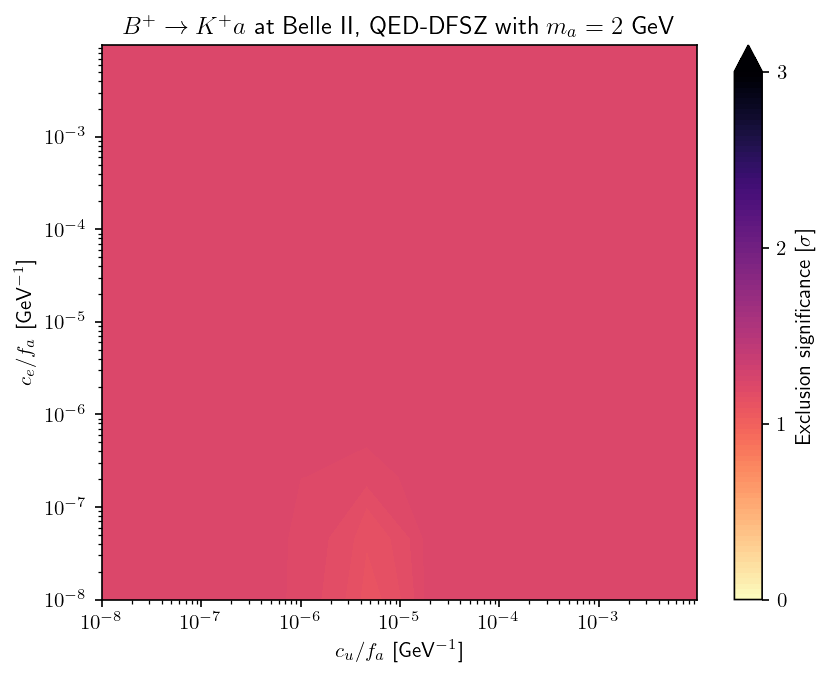

In [36]:
plt.figure(dpi=150)
pl = plt.contourf(cu_fa, ce_fa, nsigmas(np.real(chi2_bknunu_belleII_ma2),2), levels=list(np.linspace(0, 3, 100)), cmap='magma_r', vmax=3, extend='max')
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
cb = plt.colorbar(pl, extend='max')
cb.set_label(r'Exclusion significance [$\sigma$]')
cb.set_ticks([0, 1, 2, 3])
plt.xlabel(r'$c_u/f_a$ [GeV$^{-1}$]')
plt.ylabel(r'$c_e/f_a$ [GeV$^{-1}$]')
plt.title(r'$B^+ \to K^+ a$ at Belle II, QED-DFSZ with $m_a = 2$ GeV')

Text(0.5, 1.0, '$B \\to K a$ at BaBar, QED-DFSZ with $m_a=2$ GeV')

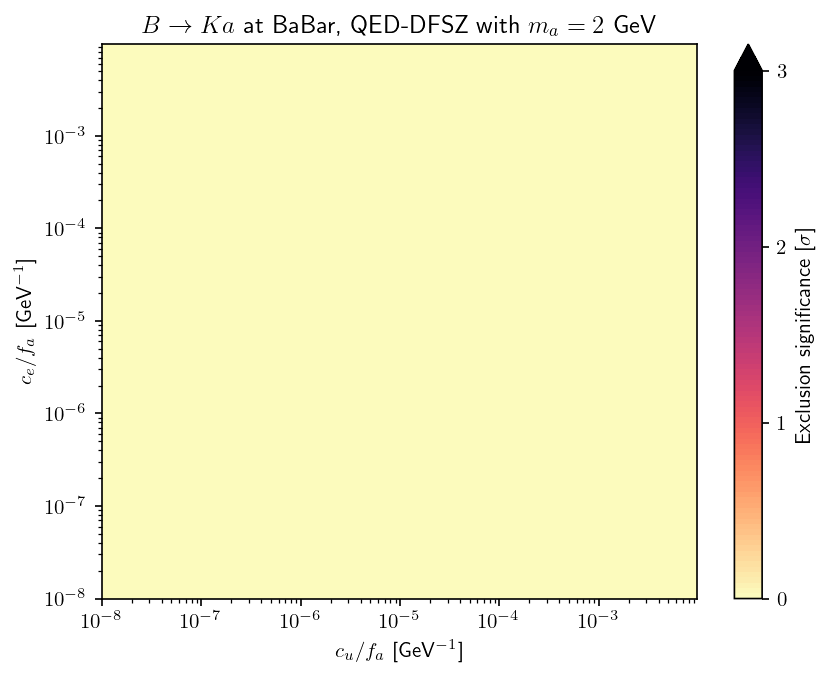

In [40]:
plt.figure(dpi=150)
pl = plt.contourf(cu_fa, ce_fa, nsigmas(np.real(chi2_bknunu_babar_ma2),2), levels=list(np.linspace(0, 3, 100)), cmap='magma_r', vmax=3, extend='max')
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
cb = plt.colorbar(pl, extend='max')
cb.set_label(r'Exclusion significance [$\sigma$]')
cb.set_ticks([0, 1, 2, 3])
plt.xlabel(r'$c_u/f_a$ [GeV$^{-1}$]')
plt.ylabel(r'$c_e/f_a$ [GeV$^{-1}$]')
plt.title(r'$B \to K a$ at BaBar, QED-DFSZ with $m_a=2$ GeV')

Text(0.5, 1.0, 'Belle II + BaBar, QED-DFSZ with $m_a = 2$ GeV')

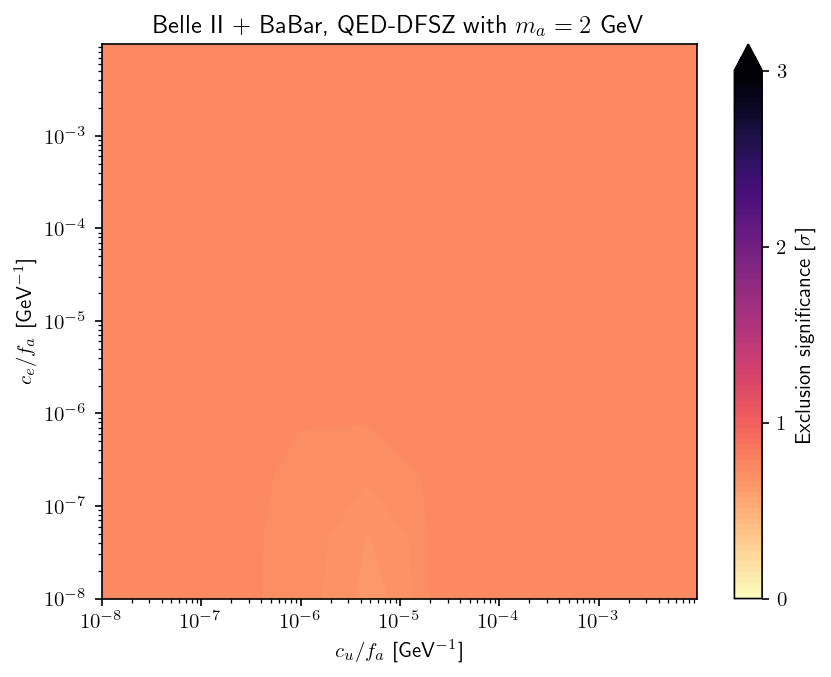

In [39]:
plt.figure(dpi=150)
pl = plt.contourf(cu_fa, ce_fa, nsigmas(np.real(chi2tot_bknunu_ma2),2), levels=list(np.linspace(0, 3, 100)), cmap='magma_r', vmax=3, extend='max')
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
cb = plt.colorbar(pl, extend='max')
cb.set_label(r'Exclusion significance [$\sigma$]')
cb.set_ticks([0, 1, 2, 3])
plt.xlabel(r'$c_u/f_a$ [GeV$^{-1}$]')
plt.ylabel(r'$c_e/f_a$ [GeV$^{-1}$]')
plt.title(r'Belle II + BaBar, QED-DFSZ with $m_a = 2$ GeV')